## 1. Written Problems 

### Question 1
#### full bayes
split ages into 3 bins : $ 20 \leq b_1 < 25$ , $  25 \leq b_2 < 45 $ , $  45 \leq b_3 $ <br>
since none of the training samples contains truck, just use pseudo counting plugging in $n_i(v) = 0 $<br>
let $\boldsymbol{x} = (truck,b_1)$<br>

$P(L)=\frac{2}{6}$<br>

$\hat{f}(\boldsymbol{x}|L)=\frac{0+1}{2+3*4}= \frac{1}{14}$<br>

$P(L|\boldsymbol{x})\: \alpha \: \hat{f}(\boldsymbol{x}|L)*P(L) = \frac{1}{42}$<br>

$P(H)=\frac{4}{6}$<br>

$\hat{f}(\boldsymbol{x}|L)=\frac{0+1}{4+3*4}= \frac{1}{16}$<br>

$P(L|\boldsymbol{x})\ \ \alpha \ \  \hat{f}(\boldsymbol{x}|H)*P(H) = \frac{1}{24}$<br>

**The point most probably belongs to class H**<br>

#### naive bayes

$P(truck|L) \ =\ \frac{0+1}{2+4}=\frac{1}{6}$<br>

$P(b_1|L) \ =\ \frac{0+1}{2+3}=\frac{1}{5}$<br>

$P(L|\boldsymbol{x}) \ \ \alpha\ \ P(b_1|L)*P(truck|L)*P(L) = \frac{1}{90}$ <br>


$P(truck|H) \ =\ \frac{0+1}{4+4}=\frac{1}{8}$<br>

$P(b_1|H) \ =\ \frac{2+1}{4+3}=\frac{1}{5}$<br>

$P(H|\boldsymbol{x}) \ \ \alpha\ \ P(b_1|H)*P(truck|H)*P(H) = \frac{1}{60}$<br>

**The point most probably belongs to class H**

### Question 2

Split $a_3$ into four bins $b_1$ to $b_4$ $(1,2), (3,4), (5,6), (7,8)$<br>
let $\boldsymbol{x} = (T,F,b_1)$<br>
use pseudo counting as $P(a_3=b_1\ |\ Y)$ would equal $0$ other wise<br>
$P(Y) = \frac{4}{9}$<br>

$P(a_1 = T \ |\ Y) = \frac{3 + 1}{4+2}=\frac{2}{3}$<br>

$P(a_2 = F \ |\ Y) = \frac{2 + 1}{4+2}=\frac{3}{6}$<br>

$P(a_3 = b_1 \ |\ Y) = \frac{0 + 1}{4+4}=\frac{1}{8}$<br>

$P(Y \ |\ \boldsymbol{x}) = P(Y)*(a_1 = T \ |\ Y)*P(a_2 = F \ |\ Y) * P(a_3 = b_1 \ |\ Y) = \frac{1}{54}$<br>

$P(N) = \frac{5}{9}$<br>

$P(a_1 = T \ |\ N) = \frac{1 + 1}{5+2} = \frac{1}{5}$<br>

$P(a_2 = F \ |\ N) = \frac{2 + 1}{5+2} = \frac{3}{5}$<br>

$P(a_3 = b_1 \ |\ N) = \frac{1 + 1}{5+4} = \frac{1}{6}$<br>

$P(Y \ |\ \boldsymbol{x}) = P(Y)*(a_1 = T \ |\ Y)*P(a_2 = F \ |\ Y) * P(a_3 = b_1 \ |\ Y) = 0.02$<br>

**The sample most probably belongs to class N**


### Question 3

$\Sigma_1^{-1} = \begin{bmatrix}2&&-1\\-3&&5\end{bmatrix}$<br>

$\Sigma_2^{-1} = \frac{1}{2}*\begin{bmatrix}1&&0\\0&&2\end{bmatrix}=\begin{bmatrix}0.5&&0\\0&&1\end{bmatrix}$<br>

$\boldsymbol{x}=\begin{bmatrix}3\\4\end{bmatrix}$<br>

$(\boldsymbol{x}-\boldsymbol{\mu_1}) = \begin{bmatrix}2\\1\end{bmatrix}$<br>

$(\boldsymbol{x}-\boldsymbol{\mu_2}) = \begin{bmatrix}-2\\-1\end{bmatrix}$<br>

$(\boldsymbol{x}-\boldsymbol{\mu_1})^T\ \ \Sigma_1^{-1}\ \ (\boldsymbol{x}-\boldsymbol{\mu_1})=1$<br>

$(\boldsymbol{x}-\boldsymbol{\mu_2})^T\ \ \Sigma_2^{-1}\ \ (\boldsymbol{x}-\boldsymbol{\mu_2})=3$<br>

$P(\boldsymbol{x}\ |\ \mu_1,\Sigma_1)=\frac{1}{2\pi}\ e^{-\frac{1}{2}} = 0.09653$<br>

$P(\boldsymbol{x}\ |\ \mu_2,\Sigma_2)=\frac{1}{2\pi\ \sqrt{2}}\ e^{-\frac{3}{2}} = 0.0251$<br>

**The point most probably belongs to class 1**

## 2. Coding 

In [1]:
% reset
import os
from math import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

%matplotlib inline
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
class PCA:

    def __init__(self):
        self.U = np.empty((0,0))

        self.idx = 0
        self._alpha = 0
        self.eigenvals = np.empty((0,0))

    @property
    def alpha(self):
        return self._alpha

    @alpha.setter
    def alpha(self, alpha):
        total_var, self.idx = np.sum(self.eigenvals), 0
        for idx in range(self.U.shape[1],-1,-1):
            if np.sum(self.eigenvals[:idx])/total_var >= alpha:
                break

    def train(self, X_train, alpha=None, r=None, load_path=None):

        if load_path is not None and os.path.isfile(load_path):
            self.U = np.real(np.load(load_path))
            return self.U

        print(X_train.shape )
        cov = np.cov(X_train.T, bias=True)
        print('computing eig')
        self.eigenvals,self.U = LA.eig(cov)
        sort_idx = np.argsort(-self.eigenvals) # descendingly sorted indices
        self.eigenvals = self.eigenvals[sort_idx]
        
        self.U = self.U[:,sort_idx]

        if r is None:
            self.alpha = alpha
        else:
            self.idx = r
        if load_path is not None:
            with open(load_path,'wb+') as f:
                np.save(f,self.U)

        return self.U[:,:self.idx]

    def project(self, X):
        return X.dot(self.U[:,:self.idx])

In [3]:
class NaiveBayes:
    def __init__(self):
        self.probs = None
        self.categorical_dims = None        


    def _f(self, x):
        rep_x = np.tile(x, (self.C, 1))
        eps = 1e-15
        diff = rep_x - self.mean
        exponent = -(np.square(diff))/(2 * self.var + eps) 
        e = np.exp(exponent)
        P_x = 1/(np.sqrt(2 * np.pi * self.var) + eps) * e
        return np.maximum(P_x, eps)


        
    def _get_probs(self, X_cat,y_cat,domains, C):
        D = X_cat.shape[1]
        probs = np.array([np.zeros((len(domains[dim]),C)) for dim in range(X_cat.shape[1]) ])
        for c in range(C):
            x = X_cat[y_cat == c+1]
            for dim in range(D):
                for d in domains[dim]:
                    n = x[:dim][np.where(x[:dim] == d)].shape[0]
                    i = dim                    
                    probs[i][d][c] = (1 + n)/(x.shape[0] + len(domains[dim]))
        return probs


    def _split(self, X, categorical_dims):
        '''
            splits X into categorical and continuos matrices
        '''
        N, D = X.shape
        continous_dims = np.setdiff1d(np.arange(D),categorical_dims)
        X_cont = X[:, continous_dims]
        X_cat = X[:, categorical_dims]
        return X_cont, X_cat


    def train(self, X_train, y_train, C,categorical_dims=None, domains=None):
        '''
            categorical_dims: dimensions with categorical values
            domains: domains of those categorical features
        
        '''
        X_cont = X_train
        probs = None
        if categorical_dims is not None:
            X_cont, X_cat = self._split(X_train,categorical_dims)
            probs = self._get_probs(X_cat, y_train, domains, C)
            self.X_cat = X_cat
            self.probs = probs
            self.domains = domains
            self.categorical_dims = categorical_dims

        N, D = X_cont.shape
        prior = np.empty(C)
        mean = np.zeros((C,D))
        var = np.zeros((C,D))
        Z = X_cont
        for c in range(C):
            x = X_cont[y_train == c + 1]
            z = Z[y_train == c + 1]
            n_c = x.shape[0] # number of examples from class c
            prior[c] = n_c/N
            mean[c,:] = np.mean(x, axis=0)
            z = z - mean[c]
            for d in range(D):
                var[c,d] = z[:,d].T.dot(z[:,d])/n_c
        
        self.C = C
        self.D = D
        self.prior = prior
        self.var = var
        self.mean = mean
        return probs, prior, mean, var

    
    def predict(self, X_test):
        N = X_test.shape[0]
        pred = np.empty(N)
        has_categorical = self.probs is not None
        if has_categorical:
            X_cont,X_cat = self._split(X_test,self.categorical_dims)
        else:
            X_cont = X_test

        for n in range(N):
            cond_probs = np.log(self._f(X_cont[n]))
            probs = np.sum(cond_probs, axis=1) + np.log(self.   prior)

            if has_categorical:
                cat_probs = np.array([ self.probs[i][X_cat[n,i]] for i in range(self.categorical_dims.shape[0]) ] )
                probs += np.sum(np.log(cat_probs), axis=1) 

            pred[n] = np.argmax(probs) + 1
        return pred

In [4]:
# download and extract the orl faces dataset
! rm -r orl_faces
! rm -r att_faces.tar.Z
! wget www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.tar.Z
! tar xvzf att_faces.tar.Z
! rm orl_faces/README

--2018-06-16 20:40:21--  http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.tar.Z
Resolving www.cl.cam.ac.uk (www.cl.cam.ac.uk)... 128.232.0.20, 2001:630:212:200::80:14
Connecting to www.cl.cam.ac.uk (www.cl.cam.ac.uk)|128.232.0.20|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/att_faces.tar.Z [following]
--2018-06-16 20:40:21--  http://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/att_faces.tar.Z
Reusing existing connection to www.cl.cam.ac.uk:80.
HTTP request sent, awaiting response... 200 OK
Length: 4075767 (3.9M) [application/x-compress]
Saving to: ‘att_faces.tar.Z’

att_faces.tar.Z     100%[===================>]   3.89M   487KB/s    in 8.3s    

2018-06-16 20:40:30 (481 KB/s) - ‘att_faces.tar.Z’ saved [4075767/4075767]

orl_faces/
orl_faces/README
orl_faces/s1/
orl_faces/s1/6.pgm
orl_faces/s1/7.pgm
orl_faces/s1/8.pgm
orl_faces/s1/9.pgm
orl_faces/s1/10.pgm
orl_fac

In [5]:
def walk_dir(root_str, action_at_leaf, action_at_parent):

    directory = os.fsencode(root_str)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        file_path = os.path.join(root_str, filename)
        if os.path.isdir(os.fsencode(file_path)):
            action_at_parent(file_path)
            walk_dir(file_path,action_at_leaf, action_at_parent)
        elif os.path.isfile(file_path):
            action_at_leaf(file_path)
            

def load_img_into(X):
    def load_img(path):
        img = Image.open(path)
        X.append(np.array(img))
    return load_img

def set_label_into(y):
    def set_label(path):
        y.extend([int(os.path.basename(path).replace('s',''))]*10)
    return set_label

def load_faces(root_path):
    X = []
    y = []
    walk_dir(root_path, load_img_into(X), set_label_into(y))
    y = np.array(y)
    X = np.array(X).reshape(400,-1)
    return X, y

In [6]:
root = 'orl_faces'
X, y = load_faces(root)
X_train = X[0:400:2,:]
X_test = X[1:400:2,:]
y_train = y[0:400:2]
y_test = y[1:400:2]

In [7]:
C = 40
NB = NaiveBayes()
_,prior, mean, var = NB.train(X_train, y_train, C)
test_pred = NB.predict(X_test)
test_acc = np.mean(test_pred == y_test)

In [8]:
print(f'testing accuracuy = {test_acc}')

testing accuracuy = 0.905


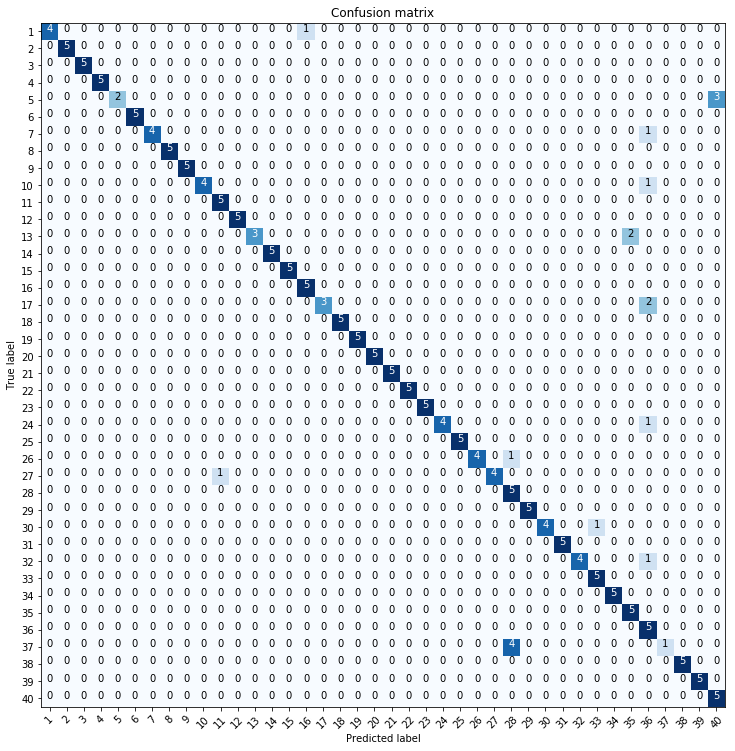

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt =  'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



conf_mat = confusion_matrix(y_test, test_pred)
plot_confusion_matrix(conf_mat, np.arange(1,41))
plt.gcf().set_size_inches(10,14)


The elements on the diagonal show the true positives, false negatives for each class is the sum of its row excluding the main diagonl, false positives on the other hand are the sum of the column of each class excluding elements on the main diagonals, those are elemnts classified as class i while belonging to another class.

In [ ]:
pca = PCA()
proj_mat = pca.train(X_train, r=40,load_path='pca_proj')
X_train_pca = pca.project(X_train)
X_test_pca = pca.project(X_test)
proj_mat.shape

(200, 10304)
computing eig


In [ ]:
NB_pca = NaiveBayes()
_,prior, mean, var = NB_pca.train(np.absolute(X_train_pca), y_train, 40)
test_pred_pca = NB_pca.predict(np.absolute(X_test_pca))
test_acc_pca = np.mean(test_pred_pca == y_test)

print(f'testing accuracuy with pca = {test_acc_pca}')

In [ ]:
conf_mat_pca = confusion_matrix(y_test, test_pred_pca)
plot_confusion_matrix(conf_mat_pca, np.arange(1,41))
plt.gcf().set_size_inches(10,14)

## 3. Midterm2 Question

In [ ]:
X = np.array([[2,6],[3,5],[4,4],[5,3],[6,2],[6,4],[6,6],[8,4],[9,2],[9,3],
              [3,3],[4,3],[4,5],[5,5],[7,3],[7,4],[7,5],
              [7,2],[10,1],[10,3],[10,5],[11,4],[11,4],[12,2],[13,5]])
y = np.array([1]*10 + [2]*7 + [3]*8)


In [ ]:
cls_means = np.array( [np.mean(X[y == c],axis=0) for c in [1,2,3]] )
cls_covs = np.array([z.T.dot(z)/z.shape[1] for z in ((X[y == c]-cls_means[c-1]) for c in [1,2,3] )])
cls_priors = np.array([X[y == c].shape[0]/X.shape[0] for c in [1,2,3]])
P = np.array([[6,5],[9,4],[8,5]])
print(f'covariance = \n{cls_covs}\n')
print(f'means = {cls_means}\n')
print(f'priors = {cls_priors}')

In [ ]:
# full bayes
import numpy.linalg as LA
C = 3
eps=1e-10
scores_full = np.empty((3,C))
for c in range(C):
    coef = 1/(2*np.pi*np.sqrt(LA.det(cls_covs[c]))+eps)
    for i in range(len(P)):
        z = P[i]-cls_means[c]
        exp = np.exp((-z.dot(LA.inv(cls_covs[c])).dot(z.T))/2)
        scores_full[i][c] = coef*exp*cls_priors[c]
        
print(scores_full)
winner_classes = np.argmax(scores_full,axis=1)
print(f'predicted classes = {winner_classes+1}')

In [ ]:
NB = NaiveBayes()
NB.train(X,y,C)
print(f'predicted classes = {NB.predict(P)}')

In [ ]:
# part e
# 0 -> out, 1 -> in
X_e = np.array([[2,6,0,0,1],[3,5,0,0,1],[4,4,0,1,1],[5,3,0,1,1],[6,2,0,1,1],[6,4,0,1,1],[6,6,0,0,1],[8,4,0,0,1],[9,2,0,0,1],[9,3,0,0,1],
              [3,3,0,1,1],[4,3,0,1,1],[4,5,0,0,1],[5,5,0,0,1],[7,3,0,0,1],[7,4,0,0,1],[7,5,0,0,1],
              [7,2,0,0,1],[10,1,0,0,0],[10,3,0,0,0],[10,5,0,0,0],[11,4,0,0,0],[11,4,0,0,0],[12,2,0,0,0],[13,5,0,0,0]])

cat_dims = np.array([2,3,4])
domains = np.array([[0,1],[0,1],[0,1]])
NB_e = NaiveBayes()
NB_e.train(X_e,y,3,cat_dims,domains)
P_e = np.array([[6,5,0,0,1],[9,4,0,0,1],[8,5,0,0,1]])
print(f'predicted classes = {NB_e.predict(P_e)}')

In [ ]:
import math
def bayes1(x, mean, covariance, dimensions):
    inverse = np.linalg.inv(covariance)
    centered = -1*(x - mean).T.dot(inverse).dot(x-mean)
    dom1 = (np.sqrt(2*math.pi))**dimensions
    dom2 =  math.sqrt(np.linalg.det(covariance))
    return (1/(dom1 * dom2)) * (math.e **((centered)/2))

x = np.array([[6.75, 4.25]])
x = x.T
pC1 = 50/150
pC2 = 100/150
mean1 = np.array([[5.01], [3.42]])
mean2 = np.array([[6.26], [2.87]])
segma1 = np.array([[0.122, 0.098], [0.098, 0.142]])
segma2 = np.array([[0.435, 0.121], [0.121, 0.110]])
print(bayes1(x, mean1, segma1, 1)* pC1)
print(bayes1(x, mean2, segma2, 1)* pC2)

In [ ]:
import numpy.linalg as LA


P = np.array([[6.75, 4.25]])
cls_priors = np.array([50/150,100/150])
cls_means = np.array([[5.01,3.42],[6.26,2.87]])
cls_covs = np.array([[[0.122, 0.098], [0.098, 0.142]],[[0.435, 0.121], [0.121, 0.110]]])
C = 2
eps=1e-10
scores_full = np.empty((1,C))
for c in range(C):
    coef = 1/(2*np.pi*np.sqrt(LA.det(cls_covs[c]))+eps)
    for i in range(len(P)):
        z = P[i]-cls_means[c]
        exp = np.exp((-z.dot(LA.inv(cls_covs[c])).dot(z.T))/2)
        scores_full[i][c] = coef*exp*cls_priors[c]
        
print(scores_full)
winner_classes = np.argmax(scores_full,axis=1)
print(f'predicted classes = {winner_classes+1}')